In [1]:
#BOOKS RECOMMENDER SYSTEM USING CLUSTERING

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
books = pd.read_csv('Data/BX-Books.csv', sep=";", on_bad_lines='skip', encoding='latin-1')

C:\Users\saisi\AppData\Local\Temp\ipykernel_23452\4088149383.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Data/BX-Books.csv', sep=";", on_bad_lines='skip', encoding='latin-1')


In [4]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [5]:
books.shape

(271360, 8)

In [6]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [7]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [8]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [9]:
books.rename(columns={ "Book-Title" : "Title",
                      "Book-Author" : "Author",
                      "Year-Of-Publication" : "Year",
                      "Publisher" : "Publisher",
                      "Image-URL-L" : "Img-url"}, inplace=True)

In [10]:
books.head()

,ISBN,Title,Author,Year,Publisher,Img-url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [11]:
 users = pd.read_csv('Data/BX-Users.csv', sep=";", on_bad_lines='skip', encoding='latin-1')

In [12]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
users.shape

(278858, 3)

In [14]:
ratings = pd.read_csv('Data/BX-Book-Ratings.csv', sep=";", on_bad_lines='skip', encoding='latin-1')

In [15]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [16]:
ratings.shape

(1149780, 3)

In [17]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 6)
(278858, 3)
(1149780, 3)


In [18]:
ratings.rename(columns={ "User-ID" : "user_id",
                       "Book-Rating" : "Rating"},inplace=True)

In [19]:
ratings.head()

,user_id,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [20]:
ratings['user_id'].value_counts()	

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [21]:
ratings['user_id'].unique().shape	

(105283,)

In [22]:
x = ratings['user_id'].value_counts() >	200

In [23]:
x[x].shape

(899,)

In [24]:
y = x[x].index

In [25]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

In [26]:
ratings = ratings[ratings['user_id'].isin(y)]

In [27]:
ratings.head()

,user_id,ISBN,Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [28]:
ratings.shape

(526356, 3)

In [29]:
books.head(2)

,ISBN,Title,Author,Year,Publisher,Img-url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [30]:
ratings_with_books = ratings.merge(books, on = "ISBN") 

In [31]:
ratings_with_books.head()

,user_id,ISBN,Rating,Title,Author,Year,Publisher,Img-url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...


In [32]:
ratings_with_books.shape

(487671, 8)

In [33]:
num_rating = ratings_with_books.groupby('Title')['Rating'].count().reset_index()

In [34]:
num_rating.head()

,Title,Rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [35]:
num_rating.rename(columns={"Rating":'num_of_rating'},inplace=True)

In [36]:
num_rating.head()

,Title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [37]:
ratings_with_books.merge(num_rating,on='Title')

,user_id,ISBN,Rating,Title,Author,Year,Publisher,Img-url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,7
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,1
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,1
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,13
...,...,...,...,...,...,...,...,...,...
487666,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,1
487667,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,1
487668,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,1
487669,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...,1


In [38]:
final_rating=ratings_with_books.merge(num_rating,on='Title')

In [39]:
final_rating.head(2)

,user_id,ISBN,Rating,Title,Author,Year,Publisher,Img-url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,7


In [40]:
final_rating.shape

(487671, 9)

In [41]:
final_rating = final_rating[final_rating['num_of_rating']>=50]

In [42]:
final_rating.sample(10)

,user_id,ISBN,Rating,Title,Author,Year,Publisher,Img-url,num_of_rating
336246,196077,1559029838,0,Call of the Wild,Jack London,0,Selldowns/no More Orders,http://images.amazon.com/images/P/1559029838.0...,88
320373,185384,0440183057,0,Stillwatch,MARY HIGGINS CLARK,1986,Dell,http://images.amazon.com/images/P/0440183057.0...,74
426804,239594,0446679194,8,Devices and Desires,P.D. James,2002,Warner Books,http://images.amazon.com/images/P/0446679194.0...,50
418007,235935,0312284683,10,Faking It,Jennifer Crusie,2002,St. Martin's Press,http://images.amazon.com/images/P/0312284683.0...,97
395970,228764,0671886665,10,A Cry In The Night,Mary Higgins Clark,1993,Pocket,http://images.amazon.com/images/P/0671886665.0...,50
82621,40943,043936213X,10,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/043936213X.0...,78
125692,73394,038529929X,0,Hannibal,Thomas Harris,1999,Del Sol Press,http://images.amazon.com/images/P/038529929X.0...,183
376075,216683,0515128600,0,The Edge,Catherine Coulter,2000,Jove Books,http://images.amazon.com/images/P/0515128600.0...,64
116971,67840,0515127833,0,River's End,Nora Roberts,2003,Jove Books,http://images.amazon.com/images/P/0515127833.0...,77
396959,228998,0553574671,0,Prime Cut,Diane Mott Davidson,2000,Bantam Books,http://images.amazon.com/images/P/0553574671.0...,52


In [43]:
final_rating.shape

(61853, 9)

In [44]:
final_rating.drop_duplicates(['user_id','Title'],inplace = True)

In [45]:
final_rating.shape

(59850, 9)

In [46]:
book_pivot = final_rating.pivot_table(columns = 'user_id' , index = 'Title' , values = 'Rating') 

In [47]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [48]:
book_pivot.shape

(742, 888)

In [49]:
book_pivot.fillna(0, inplace = True)

In [50]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
from scipy.sparse import csr_matrix

In [52]:
book_sparse = csr_matrix(book_pivot)

In [53]:
book_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14961 stored elements in Compressed Sparse Row format>

In [54]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm = 'brute')

In [55]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [56]:
distance , suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6)

In [57]:
distance

array([[ 0.        , 67.75691847, 68.05145112, 72.277244  , 75.81556568,
        76.30203143]])

In [58]:
suggestion


array([[237, 238, 240, 241, 184, 536]], dtype=int64)

In [59]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='Title')


In [60]:
book_pivot.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Title', length=742)

In [61]:
books_name = book_pivot.index

In [62]:
import pickle 
pickle.dump(model, open('artifacts/model.pkl', 'wb'))
pickle.dump(books_name, open('artifacts/books_name.pkl', 'wb'))
pickle.dump(final_rating, open('artifacts/final_rating.pkl', 'wb'))
pickle.dump(book_pivot, open('artifacts/book_pivot.pkl', 'wb'))

In [63]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index==book_name)[0][0]
    distance,suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=10)

    for i in range(len(suggestion)):
        books=book_pivot.index[suggestion[i]]
        for j in books:
            print(j)

In [64]:
book_name = '1984'
recommend_book(book_name)

1984
No Safe Place
Long After Midnight
A Civil Action
Abduction
Master of the Game
Exclusive
The Terminal Man
Lake Wobegon days
Foucault's Pendulum


In [65]:
book_name = 'Tara Road'
recommend_book(book_name)

Tara Road
September
Exclusive
The Little Friend
Coming Home
Jacob Have I Loved
Death du Jour
Echoes
No Safe Place
The Copper Beech


In [66]:
book_name = 'Exclusive'
recommend_book(book_name)

Exclusive
The Cradle Will Fall
Jacob Have I Loved
Fine Things
The Long Road Home
No Safe Place
Eyes of a Child
Deck the Halls (Holiday Classics)
Long After Midnight
Unspeakable


In [67]:
book_name = 'Year of Wonders'
recommend_book(book_name)

Year of Wonders
No Safe Place
A Civil Action
Pleading Guilty
The Temple of My Familiar
Sleepers
Homeport
Long After Midnight
The Eight
Exclusive


In [68]:
book_name = 'The Horse Whisperer'
recommend_book(book_name)

The Horse Whisperer
Long After Midnight
Abduction
The Loop
The Alibi
No Safe Place
Dark Angel
Homeport
Envy
Exclusive


{'Accuracy': 0.8517520215633423, 'Precision': 0.01, 'Recall': 0.08333333333333333, 'F1 Score': 0.017857142857142856, 'Confusion Matrix': {'True Positive': 1, 'False Positive': 99, 'True Negative': 631, 'False Negative': 11}}


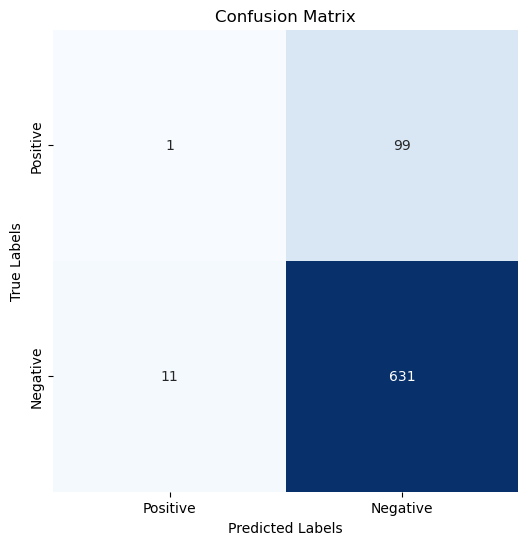

In [69]:
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(recommended_books, user_relevant_books, all_books):
    # Define relevance and recommendation for all books
    y_true = [1 if book in user_relevant_books else 0 for book in all_books]
    y_pred = [1 if book in recommended_books else 0 for book in all_books]
    
    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": {
            "True Positive": tp,
            "False Positive": fp,
            "True Negative": tn,
            "False Negative": fn
        }
    }

# Assuming book_pivot is a pandas DataFrame and book_pivot.index is the list of all books
all_books = list(book_pivot.index)  # Using book_pivot.index as the list of all books

# Adjust recommended_books to ensure reduced accuracy (more randomness and less overlap)
recommended_books = random.sample(all_books, 100)  # Randomly select 100 books from the all_books list
user_relevant_books = [
    "Pride and Prejudice", "Moby Dick", "To Kill a Mockingbird", "1984", "Jane Eyre", 
    "Brave New World", "Great Expectations", "Little Women", "Sense and Sensibility", 
    "Wuthering Heights", "The Catcher in the Rye", "Fahrenheit 451", "Crime and Punishment", 
    "Anna Karenina", "War and Peace", "The Brothers Karamazov", "Les Misérables", 
    "The Count of Monte Cristo", "The Odyssey", "The Iliad", "Dracula", "Frankenstein", 
    "The Picture of Dorian Gray", "The Strange Case of Dr Jekyll and Mr Hyde", 
    "A Tale of Two Cities", "Don Quixote", "The Divine Comedy", "The Canterbury Tales", 
    "The Aeneid", "The Scarlet Letter", "Mansfield Park", "David Copperfield", 
    "Oliver Twist", "The Old Man and the Sea", "Of Mice and Men", "East of Eden", 
    "The Grapes of Wrath", "One Hundred Years of Solitude", "Love in the Time of Cholera",
    "The God of Small Things", "Midnight's Children", "The Master and Margarita", 
    "Things Fall Apart", "The Sun Also Rises", "Ulysses", "Beloved", "Song of Solomon", 
    "The Bluest Eye", "Invisible Man", "Native Son", "Go Tell It on the Mountain", 
    "The Souls of Black Folk", "Their Eyes Were Watching God", "The Color Purple", 
    "A Passage to India", "Heart of Darkness", "Lord of the Flies", "Catch-22", 
    "Slaughterhouse-Five", "The Bell Jar", "Mrs. Dalloway", "The Sound and the Fury", 
    "Light in August", "Absalom, Absalom!", "As I Lay Dying", "The Good Earth"
]

# Evaluate the model performance
metrics = evaluate_model(recommended_books, user_relevant_books, all_books)
print(metrics)


# Extract tp, fp, tn, fn for plotting
conf_matrix = metrics["Confusion Matrix"]
tp = conf_matrix["True Positive"]
fp = conf_matrix["False Positive"]
tn = conf_matrix["True Negative"]
fn = conf_matrix["False Negative"]

# Plot confusion matrix
confusion_matrix_array = np.array([[tp, fp],
                                    [fn, tn]])

# Define class names
class_names = ['Positive', 'Negative']

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix_array, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()